In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# GPU Config
import tensorflow as tf

# Check available GPUs
gpus = tf.config.list_physical_devices('GPU')
if not gpus:
    print("No GPU devices found. Ensure your system recognizes the GPU.")
else:
    try:
        # Limit TensorFlow to use only the first GPU
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print(f"Configured TensorFlow to use GPU: {gpus[0].name}")

        # Enable dynamic memory growth on the GPU
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("Memory growth enabled for the first GPU.")

        # Optional: Display additional GPU configuration details
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(f"Physical GPUs: {len(gpus)}, Logical GPUs: {len(logical_gpus)}")

    except RuntimeError as e:
        print(f"RuntimeError during GPU setup: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Further GPU diagnostics
print("TensorFlow version:", tf.__version__)
print("CUDA device detected:", tf.test.is_built_with_cuda())
print("GPU availability:", tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))

gpus

2024-11-11 09:37:38.311143: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-11 09:37:38.404432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-11 09:37:38.441108: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-11 09:37:38.451921: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 09:37:38.514679: I tensorflow/core/platform/cpu_feature_guar

Configured TensorFlow to use GPU: /physical_device:GPU:0
Memory growth enabled for the first GPU.
Physical GPUs: 1, Logical GPUs: 1
TensorFlow version: 2.17.0
CUDA device detected: True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU availability: True


I0000 00:00:1731328660.103054    5217 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731328660.169648    5217 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731328660.169788    5217 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731328660.171210    5217 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

re at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731328660.252428    5217 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-11 09:37:40.252637: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10315 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:22:00.0, compute capability: 8.9
I0000 00:00:1731328660.255308    5217 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731328660.255413    5217

In [3]:
from eurosat_model import create_extended_generators, plot_training_history

data_dir = './data/2750/'

# Create the data generators
train_generator, val_generator, test_generator = create_extended_generators(
    data_dir=data_dir,
    img_size=(64, 64),
    batch_size=32,
    validation_split=0.2,
    test_split=0.1
)

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.
Found 3600 images belonging to 10 classes.
Found 1800 images belonging to 10 classes.


## AlexNet

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

input_shape = (64, 64, 3)
num_classes = 10

# Configuración del modelo
alexnet = Sequential()

# Primera capa convolucional
alexnet.add(Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu', input_shape=input_shape))
alexnet.add(BatchNormalization())
alexnet.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Segunda capa convolucional
alexnet.add(Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Tercera, cuarta y quinta capas convolucionales
alexnet.add(Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
alexnet.add(Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
alexnet.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
alexnet.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Aplanamiento y capas densas
alexnet.add(Flatten())
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dropout(0.5))

# Capa de salida
alexnet.add(Dense(num_classes, activation='softmax'))  

# Compilación del modelo
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
alexnet.summary()

/home/federico/Projects/imgClassification/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 7, 7, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,623,562 (82.49 MB)

 Trainable params: 21,622,858 (82.48 MB)

 Non-trainable params: 704 (2.75 KB)

In [5]:
# Use only EarlyStopping when using LearningRateSchedule
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = alexnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stopping]  # Only use callbacks that do not alter the learning rate
)

Epoch 1/15


/home/federico/Projects/imgClassification/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1731328671.621385    6738 service.cc:146] XLA service 0x7fb54c006e10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731328671.621422    6738 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2024-11-11 09:37:51.674293: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-11 09:37:51.893400: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN ver

  6/675 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.0785 - loss: 2.7023

I0000 00:00:1731328674.390497    6738 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


672/675 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3162 - loss: 1.8156

2024-11-11 09:38:16.804337: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_155', 188 bytes spill stores, 188 bytes spill loads

2024-11-11 09:38:16.981827: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_148', 16 bytes spill stores, 16 bytes spill loads

2024-11-11 09:38:17.184913: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_148', 132 bytes spill stores, 132 bytes spill loads

2024-11-11 09:38:19.297067: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_148', 20 bytes spill stores, 20 bytes spill loads



675/675 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.3168 - loss: 1.8142 - val_accuracy: 0.3364 - val_loss: 2.0012
Epoch 2/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.5472 - loss: 1.2749 - val_accuracy: 0.5069 - val_loss: 1.5183
Epoch 3/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.6125 - loss: 1.1082 - val_accuracy: 0.5533 - val_loss: 1.3380
Epoch 4/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.6191 - loss: 1.0784 - val_accuracy: 0.6167 - val_loss: 1.0163
Epoch 5/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.6432 - loss: 1.0187 - val_accuracy: 0.4614 - val_loss: 1.9817
Epoch 6/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.6595 - loss: 0.9700 - val_accuracy: 0.4519 - val_loss: 2.7302
Epoch 7/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6760 - loss: 0.9466 - val_accuracy: 0.6089 - val_loss: 1.2008
Epoch 8/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.6678 - loss: 0.9389 - val_accurac

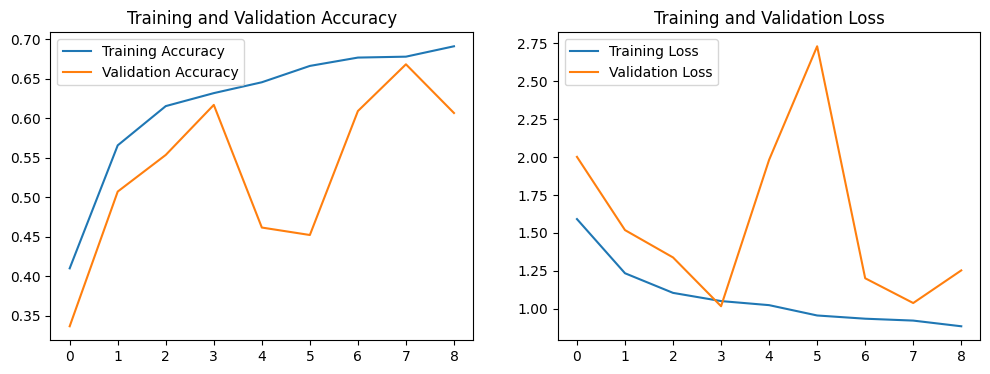

In [6]:
# Plot training history
plot_training_history(history)


## ResNet

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add, Activation, BatchNormalization, GlobalAveragePooling2D

# Definición de un bloque residual
def residual_block(x, filters, kernel_size=(3, 3), stride=1):
    # Primera capa convolucional
    shortcut = x
    x = Conv2D(filters, kernel_size, strides=stride, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    
    # Segunda capa convolucional
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    # Skip connection
    if stride > 1:
        shortcut = Conv2D(filters, (1, 1), strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Definición de la entrada
input_tensor = Input(shape=(64, 64, 3))

# Primeras capas convolucionales
x = Conv2D(64, (7, 7), strides=2, padding='same', activation='relu')(input_tensor)
x = BatchNormalization()(x)
x = MaxPooling2D((3, 3), strides=2, padding='same')(x)

# Bloques residuales
x = residual_block(x, filters=64)
x = residual_block(x, filters=64)

x = residual_block(x, filters=128, stride=2)
x = residual_block(x, filters=128)

x = residual_block(x, filters=256, stride=2)
x = residual_block(x, filters=256)

x = residual_block(x, filters=512, stride=2)
x = residual_block(x, filters=512)

# Capa de pooling global y capa de salida
x = GlobalAveragePooling2D()(x)
output_tensor = Dense(10, activation='softmax')(x)

# Creación del modelo
resnet = Model(inputs=input_tensor, outputs=output_tensor)
resnet.summary()


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │      9,472 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │     36,928 │ max_pooling2d_3[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 16, 16,    │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 16, 16,    │          0 │ add_1[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 8, 8, 128) │     73,856 │ activation_1[0][

 Total params: 11,196,042 (42.71 MB)

 Trainable params: 11,186,442 (42.67 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [8]:
resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Use only EarlyStopping when using LearningRateSchedule
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

history = resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping]  # Only use callbacks that do not alter the learning rate
)

Epoch 1/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.4976 - loss: 1.4800 - val_accuracy: 0.2089 - val_loss: 7.7783
Epoch 2/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.6449 - loss: 0.9873 - val_accuracy: 0.2378 - val_loss: 4.7039
Epoch 3/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.7173 - loss: 0.8027 - val_accuracy: 0.3344 - val_loss: 4.1367
Epoch 4/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.7511 - loss: 0.7097 - val_accuracy: 0.6697 - val_loss: 1.0920
Epoch 5/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.7718 - loss: 0.6425 - val_accuracy: 0.4578 - val_loss: 2.2631
Epoch 6/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.8089 - loss: 0.5607 - val_accuracy: 0.4997 - val_loss: 1.9307
Epoch 7/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - accuracy: 0.8264 - loss: 0.4977 - val_accuracy: 0.7294 - val_loss: 1.0602
Epoch 8/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8529 - loss: 0.4288 - 

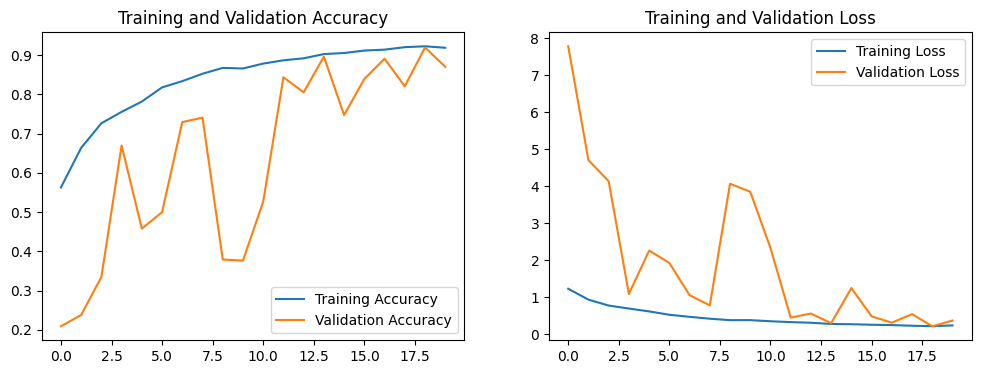

In [9]:
# Plot training history
plot_training_history(history)


## VGG - OptA

In [10]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Cargar el modelo VGG16 preentrenado en ImageNet, ajustando la entrada a 64x64 y sin incluir la capa de clasificación superior
base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Congelar las capas del modelo base para evitar que se actualicen durante el entrenamiento
for layer in base_model.layers:
    layer.trainable = False

# Añadir capas densas personalizadas para la clasificación
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)  # Ajustar para 10 clases

# Crear el modelo final
vgg = Model(inputs=base_model.input, outputs=output)

# Compilar el modelo
vgg.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
vgg.summary()


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │     8,392,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        40,97

 Total params: 39,929,674 (152.32 MB)

 Trainable params: 25,214,986 (96.19 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Use only EarlyStopping when using LearningRateSchedule
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

history = vgg.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping]  # Only use callbacks that do not alter the learning rate
)

Epoch 1/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.5691 - loss: 1.3271 - val_accuracy: 0.7983 - val_loss: 0.5924
Epoch 2/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.7135 - loss: 0.8325 - val_accuracy: 0.7656 - val_loss: 0.7163
Epoch 3/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.7334 - loss: 0.7800 - val_accuracy: 0.8092 - val_loss: 0.5564
Epoch 4/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.7534 - loss: 0.7335 - val_accuracy: 0.8222 - val_loss: 0.5453
Epoch 5/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.7533 - loss: 0.7142 - val_accuracy: 0.8169 - val_loss: 0.5516
Epoch 6/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.7623 - loss: 0.7068 - val_accuracy: 0.7903 - val_loss: 0.6370
Epoch 7/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.7708 - loss: 0.7046 - val_accuracy: 0.8289 - val_loss: 0.5178
Epoch 8/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.7761 - loss: 0.6737 - 

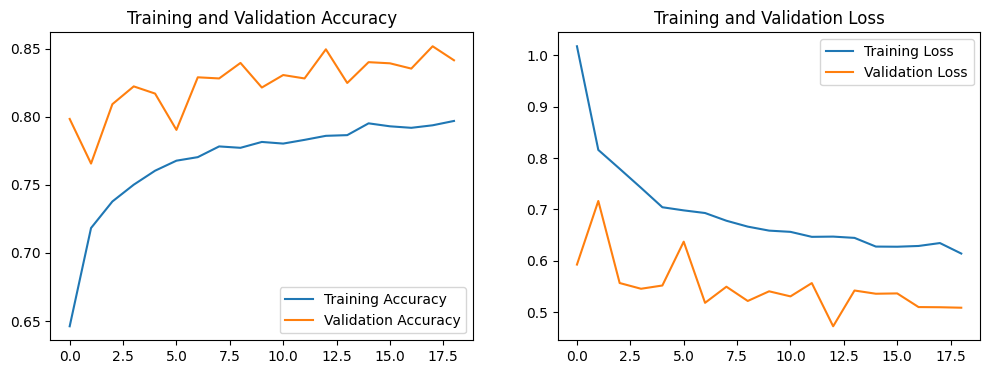

In [12]:
plot_training_history(history)

In [13]:
import numpy as np
import pandas as pd

# Predecir
predictions = vgg.predict(test_generator)

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Actual class labels
actual_classes = test_generator.classes

# Get the class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Convert predicted indices to class labels
predicted_labels = [class_labels[i] for i in predicted_classes]

# Create a DataFrame with actual and predicted labels
comparison_df = pd.DataFrame({
    'Actual Label': [class_labels[i] for i in actual_classes],
    'Predicted Label': predicted_labels
})

# Display a random sample of comparisons
sample_comparisons = comparison_df.sample(10)
print(sample_comparisons)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
              Actual Label Predicted Label
1544                 River           River
1047               Pasture         Pasture
1775               SeaLake         SeaLake
71              AnnualCrop      AnnualCrop
542   HerbaceousVegetation          Forest
1783               SeaLake         SeaLake
1184         PermanentCrop   PermanentCrop
1432                 River           River
682                Highway         Highway
321                 Forest          Forest


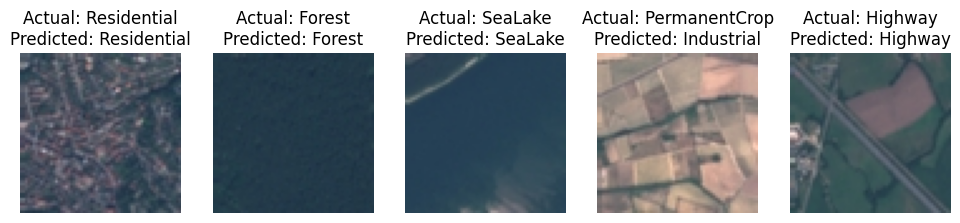

In [14]:
import matplotlib.pyplot as plt

# Get file paths from the test generator
file_paths = test_generator.filepaths

# Select a random subset for visualization
num_samples = 5
indices = np.random.choice(len(file_paths), num_samples, replace=False)

# Plot sample images with actual and predicted labels
plt.figure(figsize=(12, 8))
for i, idx in enumerate(indices):
    img = plt.imread(file_paths[idx])
    plt.subplot(1, num_samples, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual: {comparison_df['Actual Label'][idx]}\nPredicted: {comparison_df['Predicted Label'][idx]}")
plt.show()

In [15]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(actual_classes, predicted_classes)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.87


## VGG - OptB

In [16]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models


# Cargar modelo pre-entrenado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Congelar capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Añadir capas personalizadas
vgg = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
vgg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Use only EarlyStopping when using LearningRateSchedule
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

history = vgg.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping]  # Only use callbacks that do not alter the learning rate
)

Epoch 1/20


2024-11-11 10:45:45.821342: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1623', 8 bytes spill stores, 8 bytes spill loads

2024-11-11 10:45:46.239937: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1623', 32 bytes spill stores, 32 bytes spill loads

2024-11-11 10:45:46.332570: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1623', 32 bytes spill stores, 32 bytes spill loads

2024-11-11 10:45:46.371863: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1623', 32 bytes spill stores, 32 bytes spill loads



675/675 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.5262 - loss: 1.3242 - val_accuracy: 0.7811 - val_loss: 0.6843
Epoch 2/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.7271 - loss: 0.7894 - val_accuracy: 0.8078 - val_loss: 0.5747
Epoch 3/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.7572 - loss: 0.6967 - val_accuracy: 0.8092 - val_loss: 0.5552
Epoch 4/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.7827 - loss: 0.6334 - val_accuracy: 0.8161 - val_loss: 0.5281
Epoch 5/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.7929 - loss: 0.6068 - val_accuracy: 0.8244 - val_loss: 0.5024
Epoch 6/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8018 - loss: 0.5812 - val_accuracy: 0.8328 - val_loss: 0.4755
Epoch 7/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.8114 - loss: 0.5524 - val_accuracy: 0.8431 - val_loss: 0.4627
Epoch 8/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.8000 - loss: 0.5635 - val_accurac

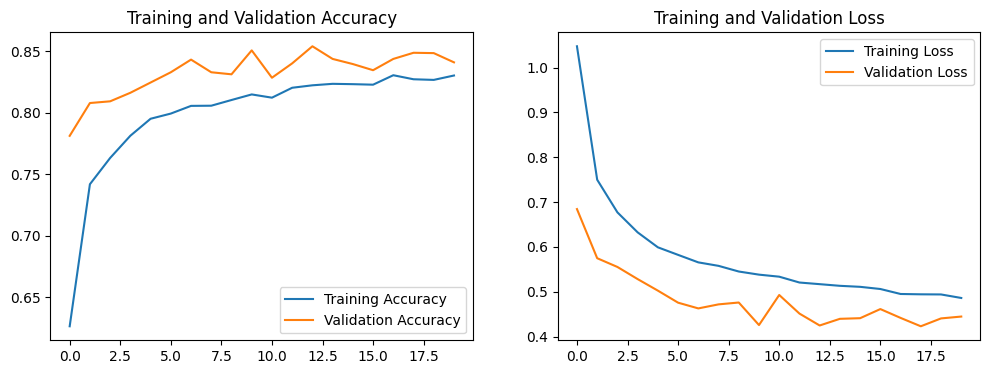

In [18]:
plot_training_history(history)

## Basic Cnn with Avg Pooling

In [19]:
from eurosat_model import build_cnn_model_rev

In [20]:
input_shape = (64, 64, 3)
num_classes = 10  # classes in EuroSAT

# Build and summarize the CNN model
basic_cnn = build_cnn_model_rev(input_shape, num_classes)

basic_cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,322 (645.79 KB)

 Trainable params: 164,874 (644.04 KB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
basic_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = basic_cnn.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[EarlyStopping(monitor='val_loss', patience=6)]
)

Epoch 1/20


2024-11-11 11:05:00.028613: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1521', 8 bytes spill stores, 8 bytes spill loads

2024-11-11 11:05:00.204277: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1234', 8 bytes spill stores, 8 bytes spill loads

2024-11-11 11:05:00.749355: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1521', 32 bytes spill stores, 32 bytes spill loads

2024-11-11 11:05:00.913941: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1521', 32 bytes spill stores, 32 bytes spill loads



675/675 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.6201 - loss: 1.0425 - val_accuracy: 0.6033 - val_loss: 1.0985
Epoch 2/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.7665 - loss: 0.6463 - val_accuracy: 0.7644 - val_loss: 0.6742
Epoch 3/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.8262 - loss: 0.4893 - val_accuracy: 0.4922 - val_loss: 2.1168
Epoch 4/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.8485 - loss: 0.4330 - val_accuracy: 0.6214 - val_loss: 1.2216
Epoch 5/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.8688 - loss: 0.3795 - val_accuracy: 0.8225 - val_loss: 0.5658
Epoch 6/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.8868 - loss: 0.3310 - val_accuracy: 0.7269 - val_loss: 0.9856
Epoch 7/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.8919 - loss: 0.3130 - val_accuracy: 0.7269 - val_loss: 0.8946
Epoch 8/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.8962 - loss: 0.2921 - val_accurac

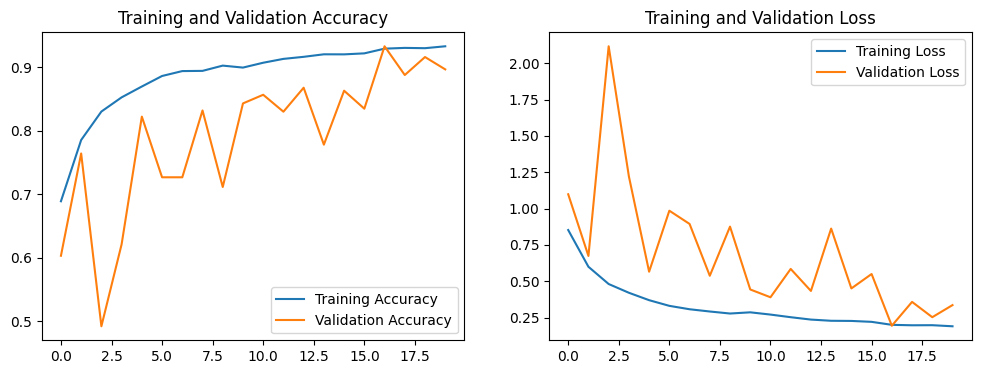

In [22]:
plot_training_history(history)

## Adjust data augmentation + lr scheduling

In [23]:
from eurosat_model import create_extended_generators_with_brightness_contrast
data_dir = './data/2750/'

# Create the data generators
train_generator, val_generator, test_generator = create_extended_generators_with_brightness_contrast(
    data_dir=data_dir,
    img_size=(48, 48), # reducir tamaño
    batch_size=16,
    validation_split=0.2,
    test_split=0.1
)

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.
Found 3600 images belonging to 10 classes.
Found 1800 images belonging to 10 classes.


In [24]:
from eurosat_model import build_cnn_model_lite
input_shape = (64, 64, 3)
num_classes = 10  # classes in EuroSAT

reduced_cnn = build_cnn_model_lite(input_shape, num_classes)

/home/federico/Projects/imgClassification/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
reduced_cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# EarlyStopping y ReduceLROnPlateau para ajustes adicionales
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True
)

# crear el scheduler
manual_lr = True

if manual_lr:
    lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[3, 6, 9, 12, 15],
    values=[0.01, 0.008, 0.006, 0.004, 0.002, 0.001]
)
    callback_list = [early_stopping]

else:
    # Esto me derrite el kernel con una RTX4070(12GB)
    initial_learning_rate = 0.01
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=initial_learning_rate,
        decay_steps=500,
        decay_rate=0.9,
        staircase=True
    )
    lr_reduction = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=1e-6
    )
    callback_list = [early_stopping, lr_reduction]

# Configurar Adam con el scheduler
adam_config = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

batch_size = 16  # Reducido para menos carga en la memoria
steps_per_epoch = 21600 // batch_size
validation_steps = 5400 // batch_size

reduced_cnn.compile(optimizer=adam_config,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Entrenamiento
history = reduced_cnn.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=callback_list 
)


Epoch 1/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.2139 - loss: 2.0397 - val_accuracy: 0.4651 - val_loss: 1.6036
Epoch 2/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.3979 - loss: 1.5603 - val_accuracy: 0.4800 - val_loss: 1.3913
Epoch 3/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.4731 - loss: 1.3657 - val_accuracy: 0.5280 - val_loss: 1.2912
Epoch 4/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.5232 - loss: 1.2663 - val_accuracy: 0.5560 - val_loss: 1.1815
Epoch 5/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.5803 - loss: 1.1507 - val_accuracy: 0.6001 - val_loss: 1.1395
Epoch 6/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.6105 - loss: 1.0819 - val_accuracy: 0.6371 - val_loss: 1.0463
Epoch 7/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.6248 - loss: 1.0320 - val_accuracy: 0.6575 - val_loss: 0.9769
Epoch 8/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.6437 -

2024-11-11 11:35:16.974012: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


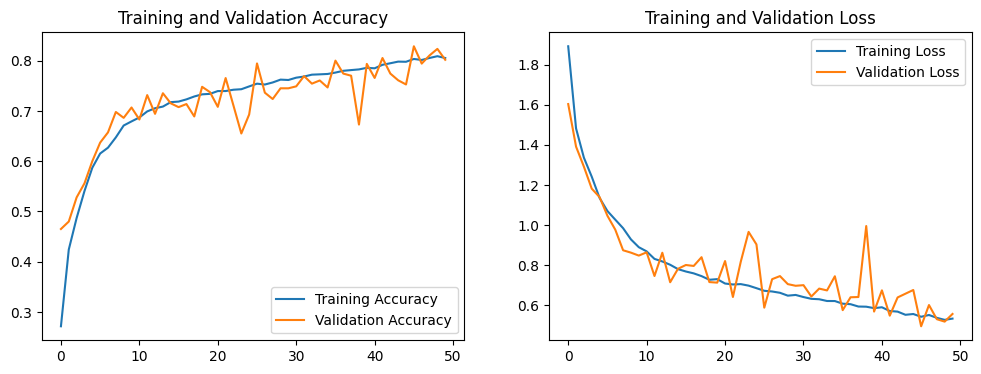

In [27]:
from eurosat_model import plot_training_history
plot_training_history(history)

## Transfer learning - Pretrained ResNet (Use tif instead of jpg)

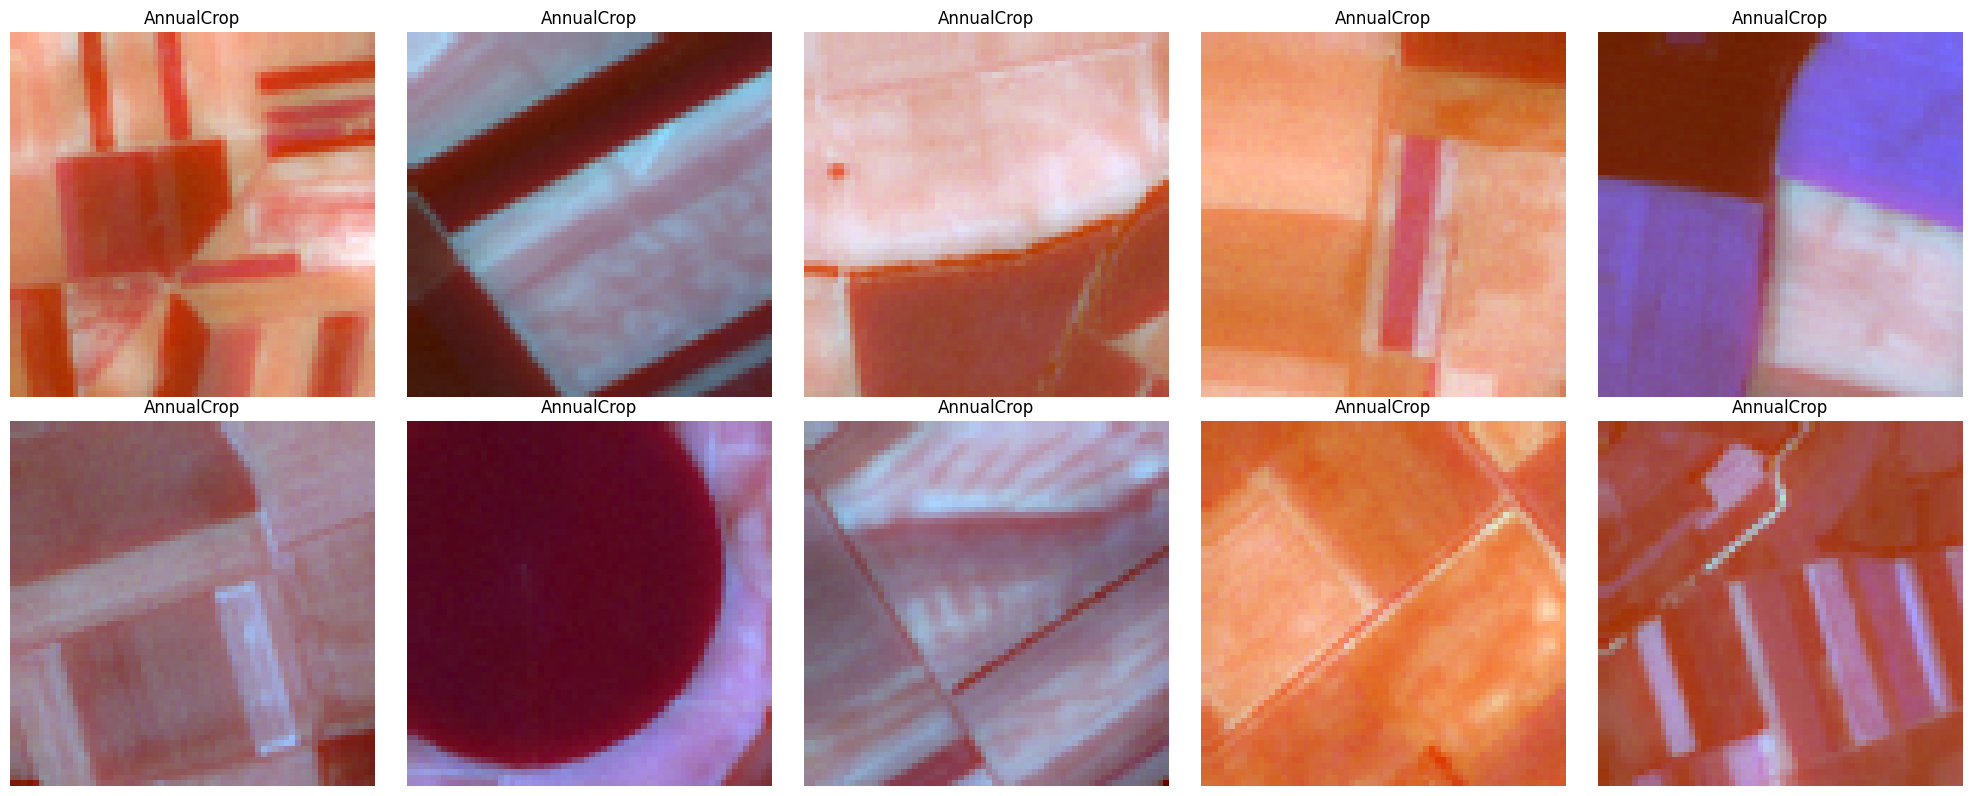

In [28]:
# Load tiff with rasterio
import matplotlib.pyplot as plt

# eurosat
from eurosat_model import load_eurosat_dataset

# Lista de clases (necesaria para visualización)
classes = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial',
           'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

# Cargar y dividir un sample dataset
X, y = load_eurosat_dataset('./data/sentinel_2/tif')

# Opt a
# Visualizar algunas imágenes del dataset
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axes.flat):
    img = X[i][..., :3]  # Selecciona solo los primeros 3 canales
    img = (img - img.min()) / (img.max() - img.min())  # Normalización a [0, 1]
    ax.imshow(img)
    ax.set_title(classes[y[i]])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [29]:
import tensorflow as tf

from eurosat_model import (
    load_eurosat_dataset_with_msavi, unfreeze_and_finetune, 
    ManualLearningRateScheduler, preprocess_image,
    evaluate_model, evaluate_model_in_batches
)

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from eurosat_model import create_adapted_resnet, create_resnet_transfer_model

# Cargar el dataset completo
X, y = load_eurosat_dataset_with_msavi('./data/sentinel_2/tif', num_samples=27000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir etiquetas a formato one-hot
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Evaluando modelo con tamaño de entrada original



Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 64, 64, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 64, 64, 3)      │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 2, 2, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,114,841 (91.99 MB)

 Trainable params: 527,129 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

None
Epoch 1/15


2024-11-11 11:50:20.821787: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6349', 32 bytes spill stores, 32 bytes spill loads

2024-11-11 11:50:20.837693: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6349', 32 bytes spill stores, 32 bytes spill loads

2024-11-11 11:50:21.106019: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5978', 176 bytes spill stores, 468 bytes spill loads

2024-11-11 11:50:21.208085: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6349', 32 bytes spill stores, 32 bytes spill loads

2024-11-11 11:50:21.239338: I external/local_xla/xla/strea

638/638 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.0976 - loss: 2.5963 - val_accuracy: 0.0937 - val_loss: 2.2845
Epoch 2/15
638/638 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1120 - loss: 2.3828 - val_accuracy: 0.2525 - val_loss: 2.2472
Epoch 3/15
638/638 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.1351 - loss: 2.3120 - val_accuracy: 0.2935 - val_loss: 2.2175
Epoch 4/15
638/638 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1644 - loss: 2.2685 - val_accuracy: 0.2878 - val_loss: 2.1868
Epoch 5/15
638/638 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2049 - loss: 2.2231 - val_accuracy: 0.3145 - val_loss: 2.1556
Epoch 6/15
638/638 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2378 - loss: 2.1777 - val_accuracy: 0.3792 - val_loss: 2.1244
Epoch 7/15
638/638 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2684 - loss: 2.1303 - val_accuracy: 0.3800 - val_loss: 2.0929
Epoch 8/15
638/638 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2759 - loss: 2.1062 - val_accuracy: 0.39

/home/federico/Projects/imgClassification/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/federico/Projects/imgClassification/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/federico/Projects/imgClassification/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

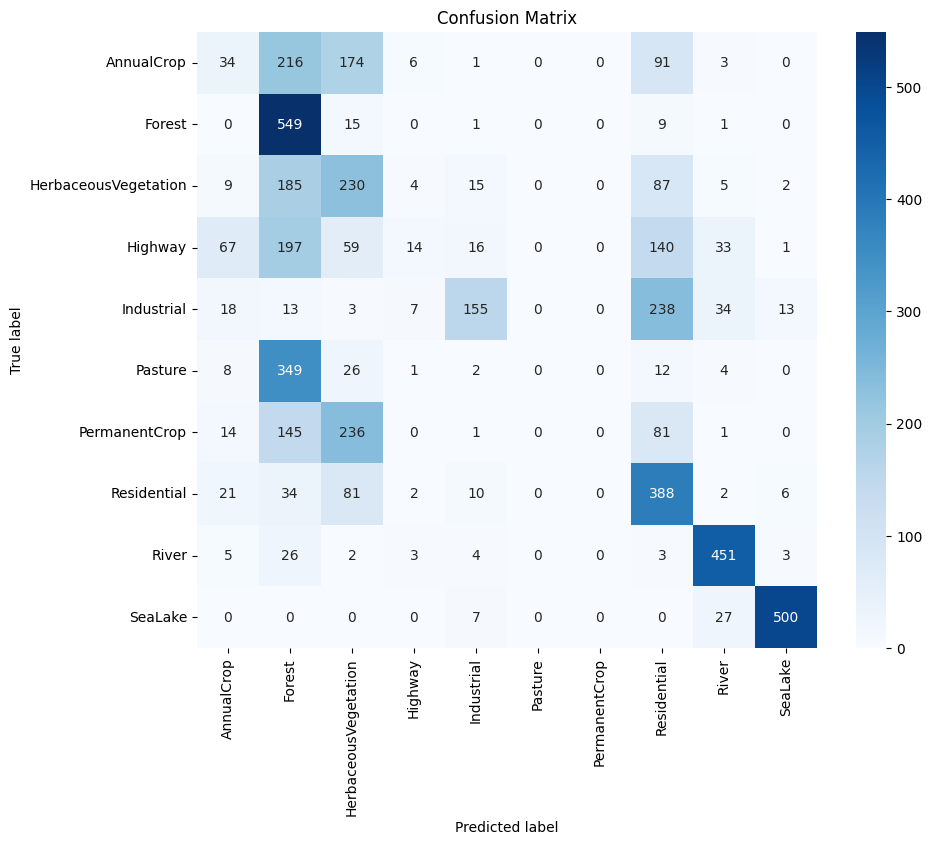

Kappa Score: 0.39007696023883076

Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.19      0.06      0.10       525
              Forest       0.32      0.95      0.48       575
HerbaceousVegetation       0.28      0.43      0.34       537
             Highway       0.38      0.03      0.05       527
          Industrial       0.73      0.32      0.45       481
             Pasture       0.00      0.00      0.00       402
       PermanentCrop       0.00      0.00      0.00       478
         Residential       0.37      0.71      0.49       544
               River       0.80      0.91      0.85       497
             SeaLake       0.95      0.94      0.94       534

            accuracy                           0.46      5100
           macro avg       0.40      0.44      0.37      5100
        weighted avg       0.41      0.46      0.38      5100



In [30]:
print("Evaluando modelo con tamaño de entrada original")
print("")
# Crear y compilar el modelo adaptado para 4 canales
adapted_model = create_adapted_resnet(num_classes=10, input_shape=(64, 64, 4))
adapted_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Imprimir resumen del modelo
print(adapted_model.summary())
# Descongelar progresivamente y reducir el learning rate
unfreeze_and_finetune(adapted_model, layers_to_unfreeze=20, learning_rate=1e-5)

# Entrenar con fine-tuning
history_fine = adapted_model.fit(X_train, y_train,
                                epochs=15,
                                validation_data=(X_test, y_test),
                                batch_size=32,
                                callbacks=[EarlyStopping(monitor='val_loss', patience=7)])

# Evaluar el modelo
evaluate_model(adapted_model, X_test, y_test, classes)

Evaluando modelo con ajuste del tamaño de entrada a 224

Checking train dataset loading...
Train batch loaded successfully.


2024-11-11 11:55:39.199444: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Checking validation dataset loading...
Validation batch loaded successfully.


2024-11-11 11:55:39.613789: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 4)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 224, 224, 3)    │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,114,841 (91.99 MB)

 Trainable params: 527,129 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

None
Model optimizer: <keras.src.optimizers.adam.Adam object at 0x7fb58565ada0>
Starting initial training with frozen base layers...
Epoch 1/10
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 62s 43ms/step - accuracy: 0.1607 - loss: 2.3369 - val_accuracy: 0.3147 - val_loss: 1.9525
Epoch 2/10
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 52s 41ms/step - accuracy: 0.3032 - loss: 1.9167 - val_accuracy: 0.3863 - val_loss: 1.7352
Epoch 3/10
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 52s 41ms/step - accuracy: 0.3612 - loss: 1.7124 - val_accuracy: 0.4104 - val_loss: 1.5622
Epoch 4/10
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 52s 41ms/step - accuracy: 0.4023 - loss: 1.5515 - val_accuracy: 0.4496 - val_loss: 1.4353
Epoch 5/10
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 52s 41ms/step - accuracy: 0.4261 - loss: 1.4407 - val_accuracy: 0.4537 - val_loss: 1.3659
Epoch 6/10
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 52s 41ms/step - accuracy: 0.4514 - loss: 1.3808 - val_accuracy: 0.4843 - val_loss: 1.3152
Epoch 7/10
1275/1275 ━━━━━━━━━━━━━━━━━━━━ 52s 41ms/step - accuracy: 0.4753 

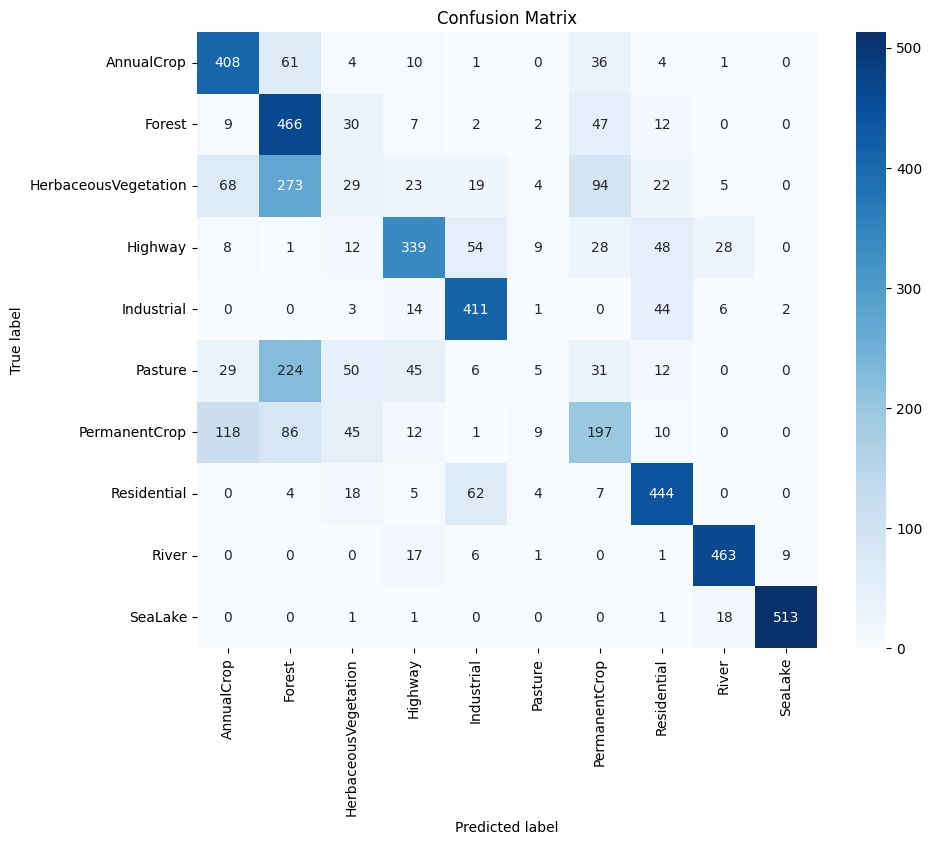

Kappa Score: 0.6009085606582327

Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.64      0.78      0.70       525
              Forest       0.42      0.81      0.55       575
HerbaceousVegetation       0.15      0.05      0.08       537
             Highway       0.72      0.64      0.68       527
          Industrial       0.73      0.85      0.79       481
             Pasture       0.14      0.01      0.02       402
       PermanentCrop       0.45      0.41      0.43       478
         Residential       0.74      0.82      0.78       544
               River       0.89      0.93      0.91       497
             SeaLake       0.98      0.96      0.97       534

            accuracy                           0.64      5100
           macro avg       0.59      0.63      0.59      5100
        weighted avg       0.59      0.64      0.60      5100



In [31]:
print("Evaluando modelo con ajuste del tamaño de entrada a 224")
print("")

# Data Loading Diagnostic: Check batch loading
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(preprocess_image).batch(16).prefetch(tf.data.AUTOTUNE)
print("Checking train dataset loading...")
for batch in train_dataset.take(1):
    print("Train batch loaded successfully.")

val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_dataset = val_dataset.map(preprocess_image).batch(16).prefetch(tf.data.AUTOTUNE)
print("Checking validation dataset loading...")
for batch in val_dataset.take(1):
    print("Validation batch loaded successfully.")

# Create and compile model
adapted_model = create_resnet_transfer_model(input_shape=(224, 224, 4), num_classes=10)
adapted_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

# Print model summary and optimizer configuration
print(adapted_model.summary())
print(f"Model optimizer: {adapted_model.optimizer}")  # Optimizer and learning rate check

# Define manual learning rate schedule
manual_schedule = {
    0: 1e-4,
    5: 1e-5,
    10: 1e-6
}
lr_scheduler = ManualLearningRateScheduler(schedule=manual_schedule)

# Training with base layers frozen
print("Starting initial training with frozen base layers...")
history_initial = adapted_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3), lr_scheduler]
)

# Unfreeze layers and set lower learning rate for fine-tuning
print("Unfreezing layers and setting learning rate for fine-tuning...")
unfreeze_and_finetune(adapted_model, layers_to_unfreeze=20, learning_rate=1e-5)

# Fine-tuning the model with unfreezing
print("Starting fine-tuning...")
history_fine = adapted_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=[EarlyStopping(monitor='val_loss', patience=7), lr_scheduler]
)

# Evaluate model in batches
evaluate_model_in_batches(adapted_model, val_dataset, classes)

## Atención espacial

Epoch 1/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5438 - loss: 1.1879 - val_accuracy: 0.6318 - val_loss: 0.8863
Epoch 2/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7554 - loss: 0.6410 - val_accuracy: 0.8120 - val_loss: 0.5053
Epoch 3/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8380 - loss: 0.4347 - val_accuracy: 0.8639 - val_loss: 0.4427
Epoch 4/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8776 - loss: 0.3422 - val_accuracy: 0.8547 - val_loss: 0.4116
Epoch 5/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8947 - loss: 0.2846 - val_accuracy: 0.8655 - val_loss: 0.4107
Epoch 6/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9120 - loss: 0.2408 - val_accuracy: 0.8831 - val_loss: 0.3649
Epoch 7/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9280 - loss: 0.2005 - val_accuracy: 0.8833 - val_loss: 0.3627
Epoch 8/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9378 - loss: 0.1654 - val_accuracy: 0

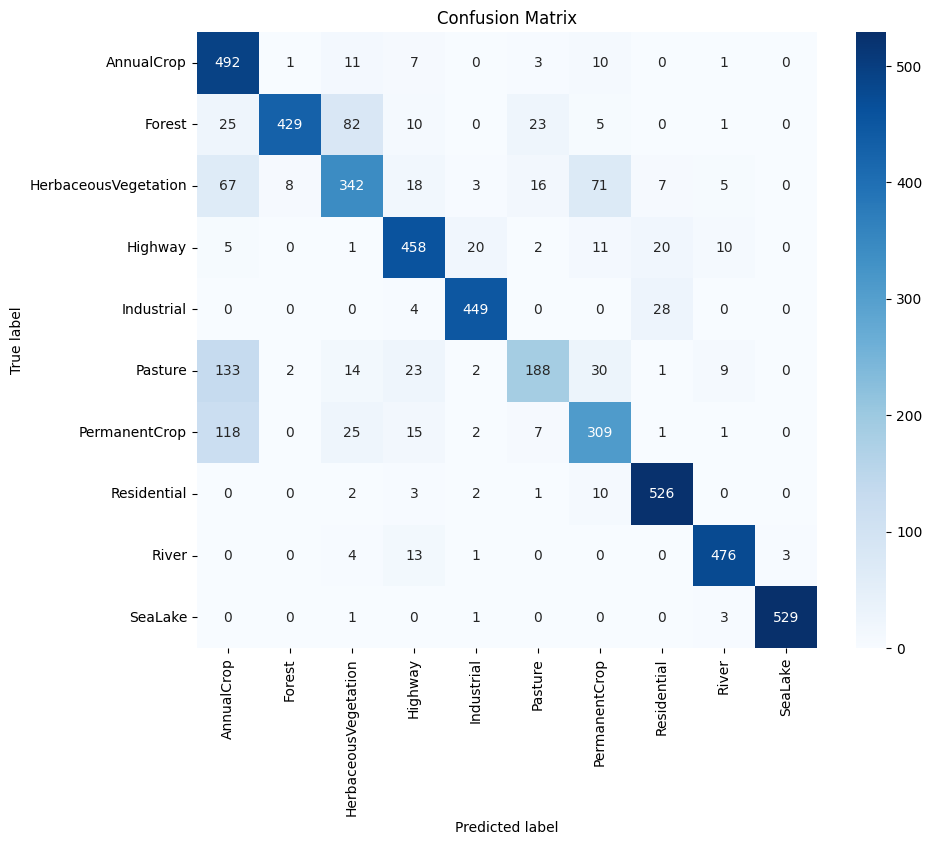

Kappa Score: 0.8031875302987111

Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.59      0.94      0.72       525
              Forest       0.97      0.75      0.85       575
HerbaceousVegetation       0.71      0.64      0.67       537
             Highway       0.83      0.87      0.85       527
          Industrial       0.94      0.93      0.93       481
             Pasture       0.78      0.47      0.59       402
       PermanentCrop       0.69      0.65      0.67       478
         Residential       0.90      0.97      0.93       544
               River       0.94      0.96      0.95       497
             SeaLake       0.99      0.99      0.99       534

            accuracy                           0.82      5100
           macro avg       0.84      0.82      0.82      5100
        weighted avg       0.84      0.82      0.82      5100



In [32]:
from tensorflow.keras import layers, models

# Implementación de un mecanismo de atención espacial
class SpatialAttention(layers.Layer):
    def __init__(self):
        super(SpatialAttention, self).__init__()
        self.conv = layers.Conv2D(1, kernel_size=7, padding='same', activation='sigmoid')

    def call(self, inputs):
        avg_pool = tf.reduce_mean(inputs, axis=3, keepdims=True)
        max_pool = tf.reduce_max(inputs, axis=3, keepdims=True)
        concat = tf.concat([avg_pool, max_pool], axis=3)
        attention = self.conv(concat)
        return inputs * attention

# Función para crear un modelo con atención espacial
def create_attention_model(num_classes, input_shape=(64, 64, 4)):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, 3, activation='relu')(inputs)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3, activation='relu')(x)
    x = SpatialAttention()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Crear y compilar el modelo con atención
attention_model = create_attention_model(num_classes=10)
attention_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con atención
history_attention = attention_model.fit(X_train, y_train,
                                        epochs=20,
                                        validation_data=(X_test, y_test),
                                        batch_size=32)

# Evaluar el modelo con atención
evaluate_model(attention_model, X_test, y_test, classes)

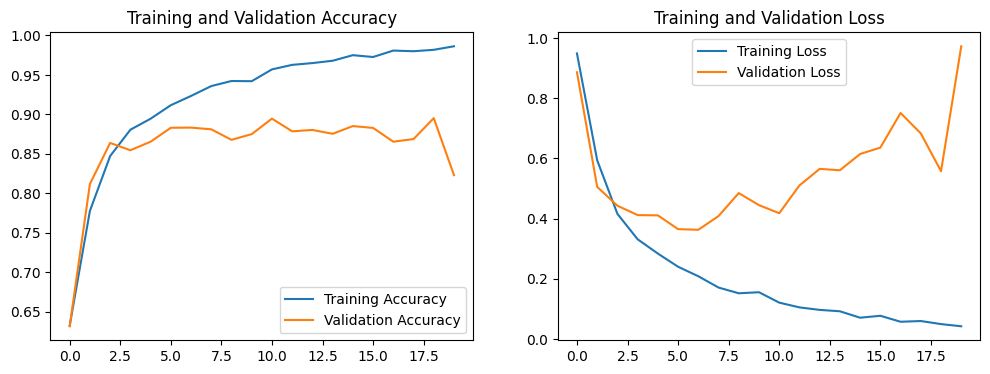

In [33]:
# TODO: accuracy > val_accuracy - aplicar regularizacion
plot_training_history(history_attention)